In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# import and check the dataset

In [2]:
churners = pd.read_csv("train.csv", skipinitialspace=True)
pd.set_option("display.max_rows", 40, "display.max_columns", 50)

In [204]:
churners.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0


In [206]:
display(churners.info(verbose = True, null_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   account_length                 int64  
 1   area_code                      object 
 2   international_plan             object 
 3   voice_mail_plan                object 
 4   number_vmail_messages          int64  
 5   total_day_minutes              float64
 6   total_day_calls                int64  
 7   total_eve_minutes              float64
 8   total_eve_calls                int64  
 9   total_night_minutes            float64
 10  total_night_calls              int64  
 11  total_intl_minutes             float64
 12  total_intl_calls               int64  
 13  number_customer_service_calls  int64  
 14  churn                          int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 448.3+ KB


None

In [5]:
churners.shape

(4250, 20)

In [6]:
churners.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
churners.isnull().sum() # no missing values

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

# Data exploration

In [8]:
churners

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


Data fields

state, string. 2-letter code of the US state of customer residence

account_length, numerical. Number of months the customer has been with the current telco provider

area_code, string="area_code_AAA" where AAA = 3 digit area code.

international_plan, (yes/no). The customer has international plan.

voice_mail_plan, (yes/no). The customer has voice mail plan.

number_vmail_messages, numerical. Number of voice-mail messages.

total_day_minutes, numerical. Total minutes of day calls.

total_day_calls, numerical. Total number of day calls.

total_day_charge, numerical. Total charge of day calls.

total_eve_minutes, numerical. Total minutes of evening calls.

total_eve_calls, numerical. Total number of evening calls.

total_eve_charge, numerical. Total charge of evening calls.

total_night_minutes, numerical. Total minutes of night calls.

total_night_calls, numerical. Total number of night calls.

total_night_charge, numerical. Total charge of night calls.

total_intl_minutes, numerical. Total minutes of international calls.

total_intl_calls, numerical. Total number of international calls.

total_intl_charge, numerical. Total charge of international calls

number_customer_service_calls, numerical. Number of calls to customer service

churn, (yes/no). Customer churn - target variable.

In [9]:
churners.churn.value_counts()  # definitely an imbalanced dataset

no     3652
yes     598
Name: churn, dtype: int64

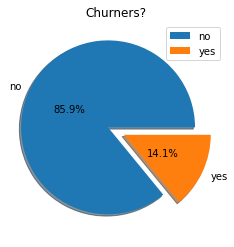

In [10]:
labels= "no", "yes"
plt.pie(churners["churn"].value_counts(), labels=labels, autopct="%.1f%%", explode=[0.1]*2, shadow=True, pctdistance=0.5);
plt.title('Churners?')
plt.legend(loc='best');

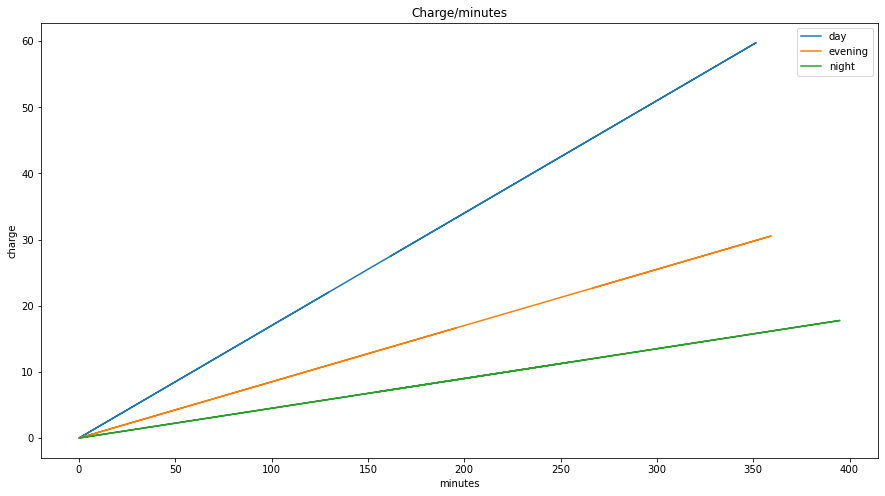

In [12]:
# Checking the price: it seems that daily calls are more expensive


fig,ax = plt.subplots()  
ax.plot(churners["total_day_minutes"], churners["total_day_charge"], label="day")
ax.plot(churners["total_eve_minutes"], churners["total_eve_charge"], label="evening")
ax.plot(churners["total_night_minutes"], churners["total_night_charge"], label="night")
ax.set_ylabel('charge') 
ax.set_xlabel('minutes')
ax.set_title("Charge/minutes")
plt.legend()
fig.set_size_inches(15,8)


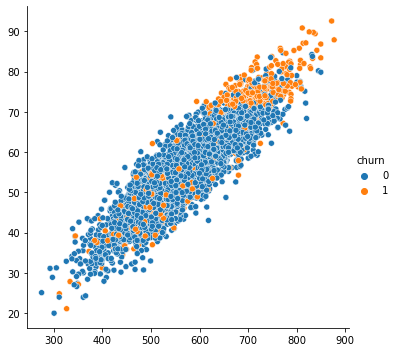

In [207]:
tot_min = churners["total_day_minutes"]+churners["total_eve_minutes"]+churners["total_night_minutes"]
tot_charge=churners["total_day_charge"]+churners["total_eve_charge"]+churners["total_night_charge"]
sns.relplot(x=tot_min, y=tot_charge, hue="churn", data=churners, kind="scatter")

# It seems that those who churn are those who spend more minutes on the phone.

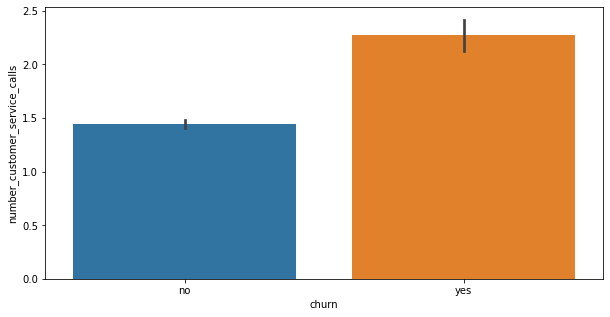

In [14]:
#Those who churn make more calls to the customer service number. Are they unsatisfied of something?
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot( x=churners["churn"], y=churners["number_customer_service_calls"]);

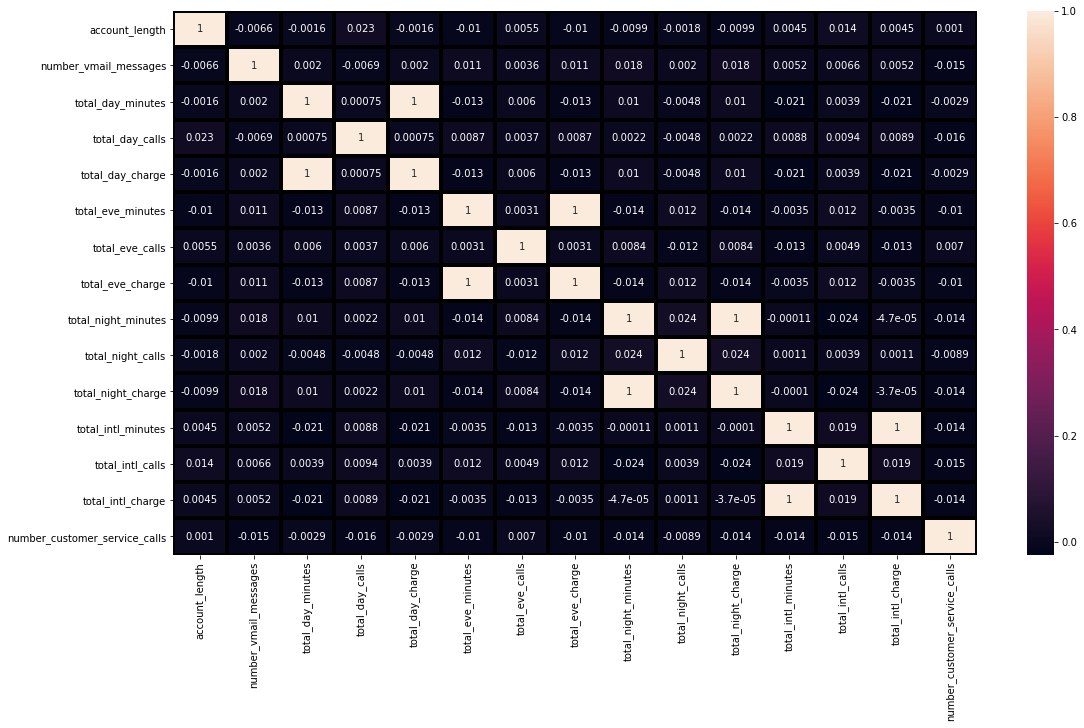

In [15]:
# Let's check the correlations

fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.heatmap(churners.corr(), annot=True, linewidths=3, linecolor='black')

In [17]:
#checking the outliers with IQR

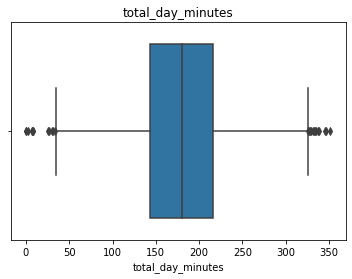

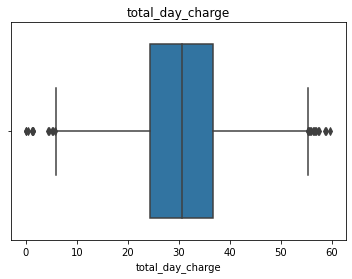

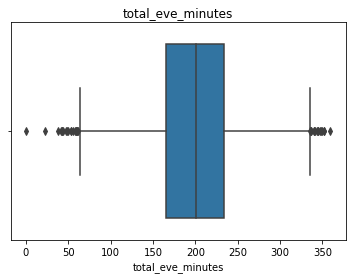

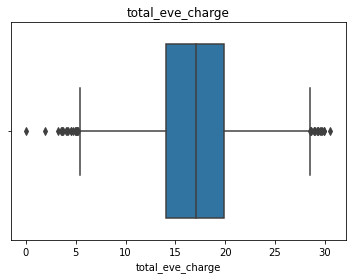

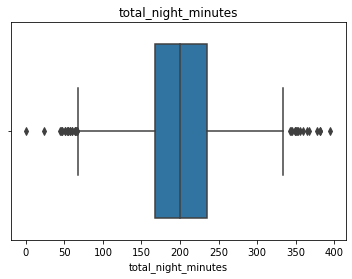

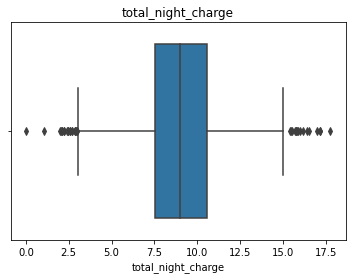

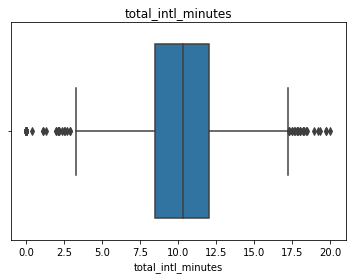

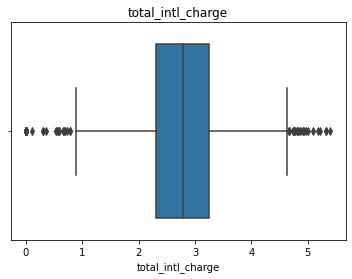

In [18]:
continuos_features=churners.select_dtypes(["float64"]).columns.to_list()
for figure in continuos_features:
    plt.figure()
    plt.title(figure)
    ax = sns.boxplot(churners[figure])     # perchè vengono così?

In [211]:
Q1 = churners.quantile(0.25)
Q3 = churners.quantile(0.75)
IQR = Q3 - Q1
outliers = (churners < (Q1 - 1.5 * IQR)) |(churners > (Q3 + 1.5 * IQR))
outliers[outliers==True].sum()

account_length                    20.0
area_code                          0.0
churn                            598.0
international_plan                 0.0
number_customer_service_calls    335.0
number_vmail_messages             86.0
total_day_calls                   28.0
total_day_minutes                 25.0
total_eve_calls                   24.0
total_eve_minutes                 34.0
total_intl_calls                 100.0
total_intl_minutes                62.0
total_night_calls                 33.0
total_night_minutes               37.0
voice_mail_plan                    0.0
dtype: float64

# preprocessing

In [22]:
churners.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [23]:
churners.state.value_counts() 

WV    139
MN    108
ID    106
AL    101
VA    100
     ... 
PA     67
GA     64
IA     62
AK     61
CA     39
Name: state, Length: 51, dtype: int64

In [24]:
 # we have 51 classes. Is onehotencoding or get_dummies appropraite in this case? we wuold have 51 more columns. Not sure, so I simply drop it

In [25]:
churners1=churners
churners1.drop("state", axis=1, inplace=True)

In [26]:
# we also drop some features wich show a strong correlation

churners1.drop(["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"], axis=1, inplace=True)


In [27]:
# Transform target feature 

b= {"no":0, "yes": 1}
churners1["churn"]=churners1["churn"].map(b)

# Create y and x 

y = churners1["churn"]
x = churners1.drop('churn',errors='ignore',axis=1)

#create dummies

x = pd.get_dummies(x, columns=["area_code", "international_plan", "voice_mail_plan"])


In [28]:
# I try to solve the imbalance problem with imblearn


rus= RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x, y)
x_rus.shape, y_rus.shape

((1196, 18), (1196,))

In [29]:
# Scaling continuos features


mms = MinMaxScaler()
mms.fit_transform(x_rus, y_rus)


array([[0.25892857, 0.        , 0.53968706, ..., 0.        , 1.        ,
        0.        ],
       [0.77232143, 0.        , 0.66998578, ..., 0.        , 1.        ,
        0.        ],
       [0.21875   , 0.        , 0.47709815, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.60714286, 0.        , 0.88876245, ..., 1.        , 1.        ,
        0.        ],
       [0.62053571, 0.        , 0.69615932, ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.        , 0.71863442, ..., 0.        , 1.        ,
        0.        ]])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

In [31]:
l_reg=LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=123)
distributions = {"solver": ['newton-cg', 'lbfgs', 'liblinear'], "penalty":['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter':[400,500,600]}
scoring = ["precision",'accuracy', "f1", "roc_auc"]   
log = RandomizedSearchCV(l_reg, distributions, n_iter=20, scoring=scoring, refit="roc_auc", n_jobs=-1, cv=cv, random_state=123)
log.fit(x_rus, y_rus)
print(log.best_params_, log.best_score_)



{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 400, 'C': 1000} 0.8354947595704948


In [32]:
y_pred= log.predict(x_rus)
prob_log= log.predict_proba(x_rus)

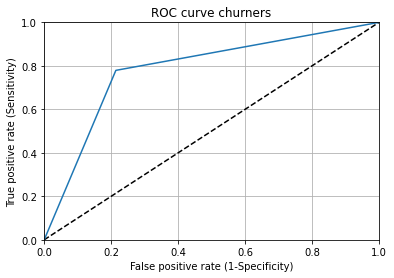

In [33]:
#Curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_rus, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve churners')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

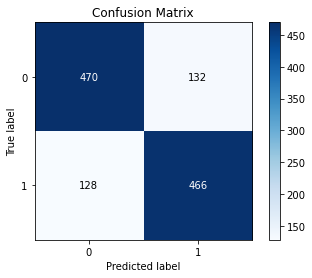

In [35]:
skplt.metrics.plot_confusion_matrix(y_pred, y_rus)

In [36]:
print(classification_report(y_pred, y_rus))  # too many false negatives, horrible

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       602
           1       0.78      0.78      0.78       594

    accuracy                           0.78      1196
   macro avg       0.78      0.78      0.78      1196
weighted avg       0.78      0.78      0.78      1196



# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [104]:
param = {"n_neighbors": [i for i in range(1, 15)], "weights": ["uniform", "distance"], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
KNN = RandomizedSearchCV(estimator=knn, param_distributions=param, n_iter=10, scoring=scoring, refit="roc_auc", n_jobs=-1, cv=cv, random_state=123)
KNN.fit(x_rus, y_rus)
print(KNN.best_params_, KNN.best_score_, KNN.best_estimator_)

{'weights': 'uniform', 'n_neighbors': 14, 'algorithm': 'kd_tree'} 0.7355843954248367 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=14)


In [ ]:
ypred=KNN.predict(x_rus)

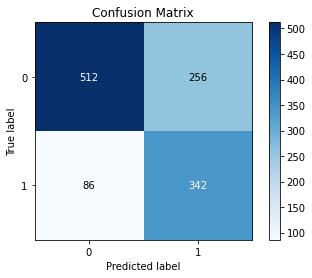

In [212]:
skplt.metrics.plot_confusion_matrix(ypred, y_rus)   # horrible

In [42]:
print(classification_report(ypred, y_rus))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       768
           1       0.57      0.80      0.67       428

    accuracy                           0.71      1196
   macro avg       0.71      0.73      0.71      1196
weighted avg       0.75      0.71      0.72      1196



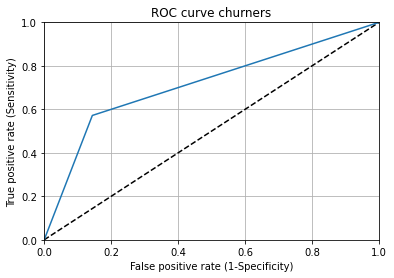

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_rus, ypred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve churners')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# DECISION TREE

In [213]:
from sklearn.tree import DecisionTreeClassifier 
dtc= DecisionTreeClassifier()
parameters = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_depth": [i for i in range (1,19)]}
DTC = RandomizedSearchCV(dtc, parameters, scoring=scoring, refit="roc_auc",n_jobs=-1, cv=cv, random_state=123)
DTC.fit(x_rus,y_rus)
print(DTC.best_params_, DTC.best_score_)

{'splitter': 'best', 'max_depth': 5, 'criterion': 'gini'} 0.8824190184407095


In [50]:
y_pred_DTC=DTC.predict(x_rus)

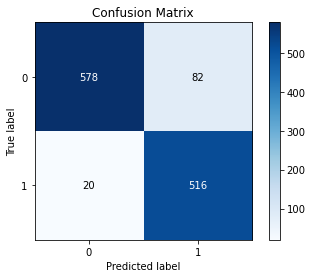

In [51]:
skplt.metrics.plot_confusion_matrix(y_pred_DTC, y_rus) 

In [52]:
print(classification_report(y_pred_DTC, y_rus))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       660
           1       0.86      0.96      0.91       536

    accuracy                           0.91      1196
   macro avg       0.91      0.92      0.91      1196
weighted avg       0.92      0.91      0.91      1196



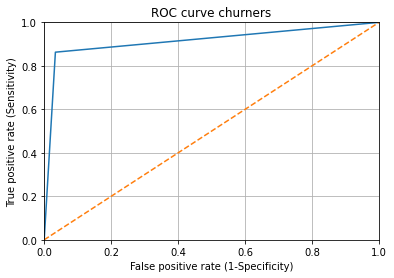

In [53]:
fpr, tpr, thresholds = roc_curve(y_rus, y_pred_DTC)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve churners')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
# I tried to make the predictions on the test set

In [197]:
test=pd.read_csv("test.csv")
test1=test
test1

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [198]:
test1.drop(["id", "state", "total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"], axis=1, inplace=True)

In [199]:
test1 = pd.get_dummies(test1, columns=["area_code", "international_plan", "voice_mail_plan"])

In [200]:
mms.fit_transform(test1)

array([[0.53586498, 0.49019608, 0.74667455, ..., 0.        , 0.        ,
        1.        ],
       [0.49367089, 0.        , 0.62341117, ..., 1.        , 1.        ,
        0.        ],
       [0.25738397, 0.        , 0.31983447, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.6371308 , 0.        , 0.50753769, ..., 0.        , 1.        ,
        0.        ],
       [0.25316456, 0.        , 0.378658  , ..., 0.        , 1.        ,
        0.        ],
       [0.4556962 , 0.        , 0.52113509, ..., 0.        , 1.        ,
        0.        ]])

In [203]:
Churn_log=log.predict(test1)
Churn_KNN=KNN.predict(test1)
Churn_DTC=KNN.predict(test1)
test1["Churn_log"]=Churn_log
test1["Churn_KNN"]=Churn_KNN
test1["Churn_DTC"]=Churn_DTC
test1

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,Churn_log,Churn_KNN,Churn_DTC
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0,1,0,0,1,0,1,1
1,118,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,0,1,0,1,1,0,1,0,0
2,62,0,120.7,70,307.2,76,203.0,99,13.1,6,4,0,1,0,1,0,1,0,1,1,1
3,93,0,190.7,114,218.2,111,129.6,121,8.1,3,3,0,0,1,1,0,1,0,1,0,0
4,174,0,124.3,76,277.1,112,250.7,115,15.5,5,3,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,226.3,97,202.7,111,11.3,7,0,0,1,0,1,0,1,0,0,0,0
746,73,0,177.2,118,270.5,84,241.8,112,12.3,2,3,1,0,0,1,0,1,0,1,0,0
747,152,0,184.2,90,256.8,73,213.6,113,14.7,2,3,0,1,0,1,0,1,0,1,0,0
748,61,0,140.6,89,172.8,128,212.4,97,13.6,4,1,0,1,0,1,0,1,0,0,0,0


In [ ]:
# I wasn't able to make a single function 